In [1]:
import numpy as np
import sncosmo

In [2]:
from astropy import constants as const
from astropy import units as u

c = const.c.cgs
h = const.h.cgs
k_B = const.k_B.cgs

In [3]:
# class BlackBodySource(sncosmo.Source):
#     _param_names = ['temperature']
#     param_names_latex = ['T (K)']
    
#     def __init__(self, temperature):
#         self.temperature = temperature
#         self.name = 'BlackBody'
#         self._wave = np.linspace(1, 150000, 200)
#         self._parameters = [self.temperature]
        
#     def _flux(self, phase, wave):
#         temperature = self.temperature * u.Kelvin
#         nu = c / (wave * u.angstrom).cgs
#         scale = 144.90744350236645 #scale abs sdss g mag to -19.5
        
#         coeff = 2 * h * (nu**3) / (c ** 2)
#         denominator = np.exp(h* nu / (k_B * temperature)) - 1
#         spectrum = (coeff / denominator)
#         #print(spectrum)
#         spectrum = scale * spectrum.value
        
#         return spectrum.reshape(1, len(spectrum))

In [4]:
class BlackBodySource(sncosmo.Source):
    _param_names = ['temperature', 'scale']
    param_names_latex = ['T (K)', 'Scale']
    
    def __init__(self, temperature, scale = 1.0477889428400054e-17):
        self.temperature = temperature
        self.name = 'BlackBody'
        self._wave = np.linspace(1, 150000, 200)
        self._parameters = [self.temperature, scale]
        self.scale = scale
        
    def _flux(self, phase, wave):
        temperature = self.temperature * u.Kelvin
        #nu = c / (wave * u.angstrom).cgs
        wave = (wave* u.angstrom).cgs
        scale = self.scale #scale abs sdss g mag to -19.5
        #print(f'generating spectrum for temperature {temperature} and scale {scale}')
        
        coeff = 2 * h * (c ** 2) / (wave **5)
        denominator = np.exp(h* c / (wave * k_B * temperature)) - 1
        spectrum = (coeff / denominator) #.to((u.erg) * (u.s**-1) * (u.cm**-2) * (u.Angstrom**-1))
        spectrum = scale * spectrum.value
        
        return spectrum.reshape(1, len(spectrum))

In [31]:
import sys
sys.path.append('../')
from scripts import tde_utils
import importlib
importlib.reload(tde_utils)

<module 'scripts.tde_utils' from '/Users/mitchell/offcenter_blackholes/notebooks/../scripts/tde_utils.py'>

In [32]:
source = tde_utils.BlackBodySource(30000)#, scale = 1.0477889428400054e-17)
bb_model = sncosmo.Model(source=source)
bb_model.set(z=0)
wave = np.linspace(200.0, 8000.0, 500)
flux = bb_model.flux(time=0, wave=wave)

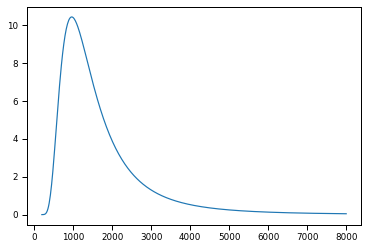

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
plt.plot(wave, flux)

In [34]:
wave[np.argmax(flux)]

965.93186372745492

In [35]:
bb_model.set(z=0)
bb_model.bandmag('sdssg', 'ab', 0)

-19.5

In [36]:
mag_diff = -19.5 - bb_model.bandmag('sdssg', 'ab', 0)
mag_diff

0.0

In [37]:
10**(mag_diff/-2.5)

1.0

In [38]:
bb_model.parameters, bb_model.param_names

(array([  0.00000000e+00,   0.00000000e+00,   3.00000000e+04,
          1.04778894e-17]),
 ['z', 't0', 'temperature', 'scale'])

In [39]:
from astropy.cosmology import WMAP9 as cosmo

luminosity_distance = cosmo.luminosity_distance(.075)
bb_model.set(z=.075)
bb_model.bandmag('ztfg', 'ab', 0) + 5*np.log10(luminosity_distance/(10 * u.parsec))

<Quantity 18.02170834804986>

In [40]:
#bb1 
#bb2 18.021708

In [41]:
from matplotlib.colors import Normalize
from matplotlib import cm

In [42]:
roman_filters = ['f062', 'f087', 
                 'f106', 'f129', 
                 'f158', 'f184', 
                 'f213', 'f146']

In [43]:
z_limits = {'f062': 4.91,
               'f087': 3.86, 
               'f106': 7.07,
               'f129': 7.08,
               'f158': 6.45,
               'f184': 7.17
              }


In [44]:
import seaborn as sns
sns.set_context('paper')

800.0 1748.82976595
800.0 2289.8979796
956.831366273 2823.12462492
1137.18743749 3364.19283857
1325.38507702 3897.4194839
1505.74114823 4438.48769754
1686.09721944 4971.71434287
1866.45329066 5512.78255651
2046.80936187 6046.00920184
2227.16543309 6587.07741548
2407.5215043 7120.30406081
2587.87757552 7661.37227445
2776.07521504 8194.59891978
2956.43128626 8735.66713343
3136.78735747 9276.73534707
3317.14342869 9809.9619924
3497.4994999 10351.030206
3677.85557111 10884.2568514
3858.21164233 11425.325065
4038.56771354 11958.5517103
4218.92378476 12499.619924
4407.12142428 13032.8465693
4587.4774955 13573.914783
4767.83356671 14107.1414283
4948.18963793 14648.2096419
5128.54570914 15181.4362873
5308.90178036 15722.5045009
5489.25785157 16255.7311462
5669.61392278 16796.7993599
5857.81156231 17330.0260052
6038.16763353 17871.0942188
6218.52370474 18404.3208642
6398.87977596 18945.3890778
6579.23584717 19478.6157231
6759.59191838 20019.6839368
6939.9479896 20552.9105821
7120.30406081 21093

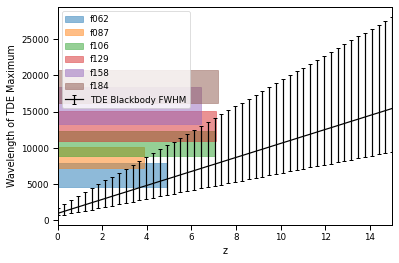

In [48]:
source = tde_utils.BlackBodySource(30000)
bb_model = sncosmo.Model(source=source)
wave = np.linspace(800.0, 40000.0, 5000)


n = 50
peakwaves = np.zeros(n)
lower_bounds = np.zeros(n)
upper_bounds = np.zeros(n)
#bounds = np.zeros([2, n])
zs = np.linspace(0., 15, n)

for i, z in enumerate(zs):
    bb_model.set(z=z)
    flux = bb_model.flux(time=0, wave=wave)
    imax = np.argmax(flux)
    wavemax = wave[imax]
    
    lower_99 = np.where((flux> 0.50*flux[imax]) & (wave < wavemax))[0]
    lower_bound = wave[np.min(lower_99)]
    upper_99 = np.where((flux> 0.50*flux[imax]) & (wave > wavemax))[0]
    upper_bound = wave[np.max(upper_99)]
    
#     plt.plot(wave, flux)
#     plt.axvline(lower_bound)
#     plt.axvline(upper_bound)
#     plt.show()
    print(lower_bound, upper_bound)
    
    peakwaves[i] = wavemax
    #bounds.append([lower_bound, upper_bound])
    lower_bounds[i] = wavemax - lower_bound
    upper_bounds[i] = upper_bound - wavemax
    
plt.errorbar(zs, peakwaves, yerr = [lower_bounds, upper_bounds], c = 'k', capsize = 2, label = 'TDE Blackbody FWHM')
ax = plt.gca()
ax.set_xlim(0, 15)
for i, f in enumerate(z_limits.keys()):
    band = sncosmo.get_bandpass(f)
    limit = z_limits[f]
    band = sncosmo.get_bandpass(f)
    z_contam = (band.minwave() / l_alpha) - 1
    if limit > z_contam:
        print('repacing max z {} with lyman-corrected: {}'.format(max_z, z_contam))
        limit = z_contam
    coord_limit = limit/15
    ax.axhspan(band.minwave(), band.maxwave(), xmax=coord_limit,
               alpha=0.5, color='C{}'.format(i), label = f)
    
plt.legend()
plt.xlabel('z')
plt.ylabel('Wavelength of TDE Maximum')
plt.savefig('../figures/wave_vs_z_roman.pdf', dpi = 300)
plt.show()

In [26]:
print(lower_bounds)

[   949.78995799   1237.84756951   1529.74594919   1817.80356071
   2105.86117223   2397.75955191   2685.81716343   2977.71554311
   3265.77315463   3557.67153431   3845.72914583   4137.62752551
   4425.68513703   4713.74274855   5005.64112823   5293.69873975
   5585.59711942   5873.65473095   6165.55311062   6453.61072214
   6741.66833367   7033.56671334   7321.62432486   7613.52270454
   7901.58031606   8193.47869574   8481.53630726   8773.43468694
   9061.49229846   9349.54990998   9641.44828966   9929.50590118
  10221.40428086  10509.46189238  10801.36027205  11089.41788358
  11381.31626325  11669.37387477  11957.4314863   12249.32986597
  12537.3874775   12829.28585717  13117.34346869  13409.24184837
  13697.29945989  13989.19783957  14277.25545109  14565.31306261
  14857.21144229  15145.26905381]


/var/folders/9_/177p01wj5yq421833hg4p2yc0000gn/T/ipykernel_4058/593233663.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap='coolwarm'), label = 'z')


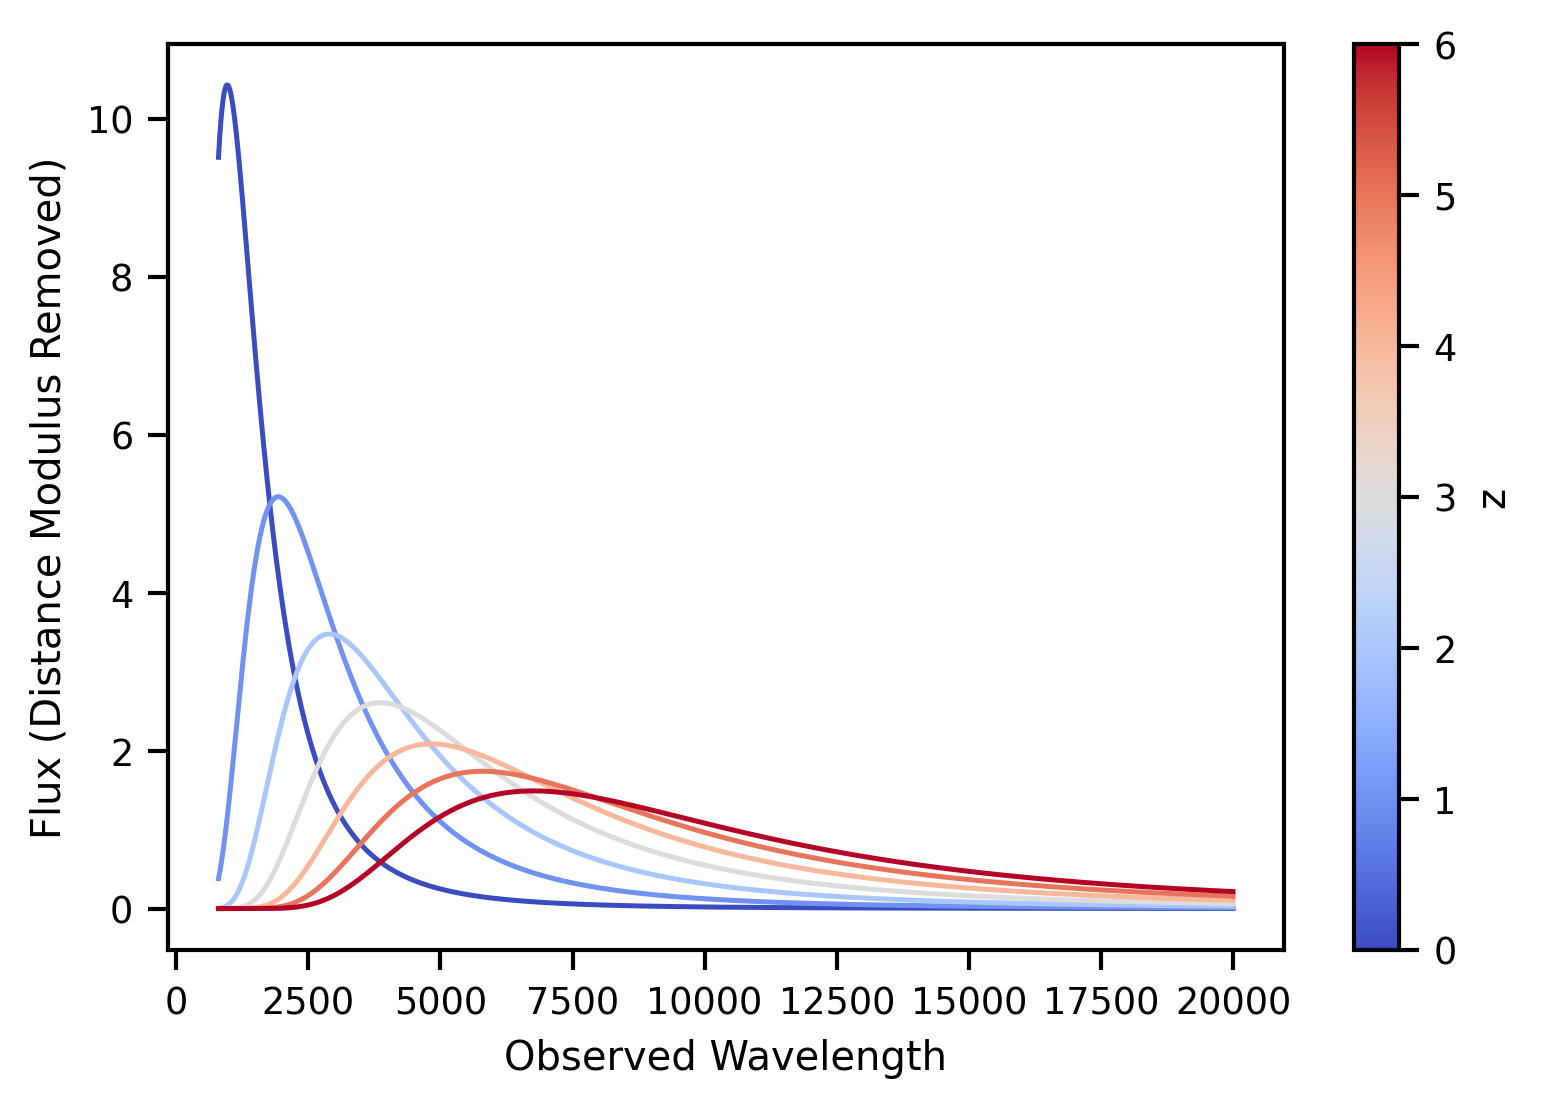

In [31]:
roman_filters = ['f062', 'f087', 
                 'f106', 'f129', 
                 'f158', 'f184', 
                 'f213', 'f146']

color_dict = {f: f'C{i}' for i, f in enumerate(roman_filters)}

norm = Normalize(0, 6)

fig, ax = plt.subplots(dpi = 300)
for z in np.linspace(0.000000001, 6, 7):
    source = tde_utils.BlackBodySource(30000)
    bb_model = sncosmo.Model(source=source)
    bb_model.set(z=z)
    # print(bb_model.bandmag('sdssg', 'ab', 0))
    wave = np.linspace(800.0, 20000.0, 5000)
    flux = bb_model.flux(time=0, wave=wave)
#     print(f'z = {z}')
    pred = (2.897771955e-3 / 30000) * (1 + z) * 1e10
#     print('Predicted peak wavelength: ', pred)
#     print('Observed Peak wavelength: ', wave[np.argmax(flux)])
    p = plt.plot(wave, flux, color=cm.coolwarm(norm(z)))

plt.colorbar(cm.ScalarMappable(norm=norm, cmap='coolwarm'), label = 'z')
plt.xlabel('Observed Wavelength')
plt.ylabel('Flux (Distance Modulus Removed)')
plt.savefig('../figures/spectra.pdf', bbox_inches='tight')
plt.show()

In [27]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable=None, cax=None, ax=None, **kwargs)
    Add a colorbar to a plot.
    
    Parameters
    ----------
    mappable
        The `matplotlib.cm.ScalarMappable` (i.e., `.AxesImage`,
        `.ContourSet`, etc.) described by this colorbar.  This argument is
        mandatory for the `.Figure.colorbar` method but optional for the
        `.pyplot.colorbar` function, which sets the default to the current
        image.
    
        Note that one can create a `.ScalarMappable` "on-the-fly" to
        generate colorbars not attached to a previously drawn artist, e.g.
        ::
    
            fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    
    cax : `~matplotlib.axes.Axes`, optional
        Axes into which the colorbar will be drawn.
    
    ax : `~.axes.Axes` or list or `numpy.ndarray` of Axes, optional
        One or more parent axes from which space for a new colorbar axes
        will be stolen, if

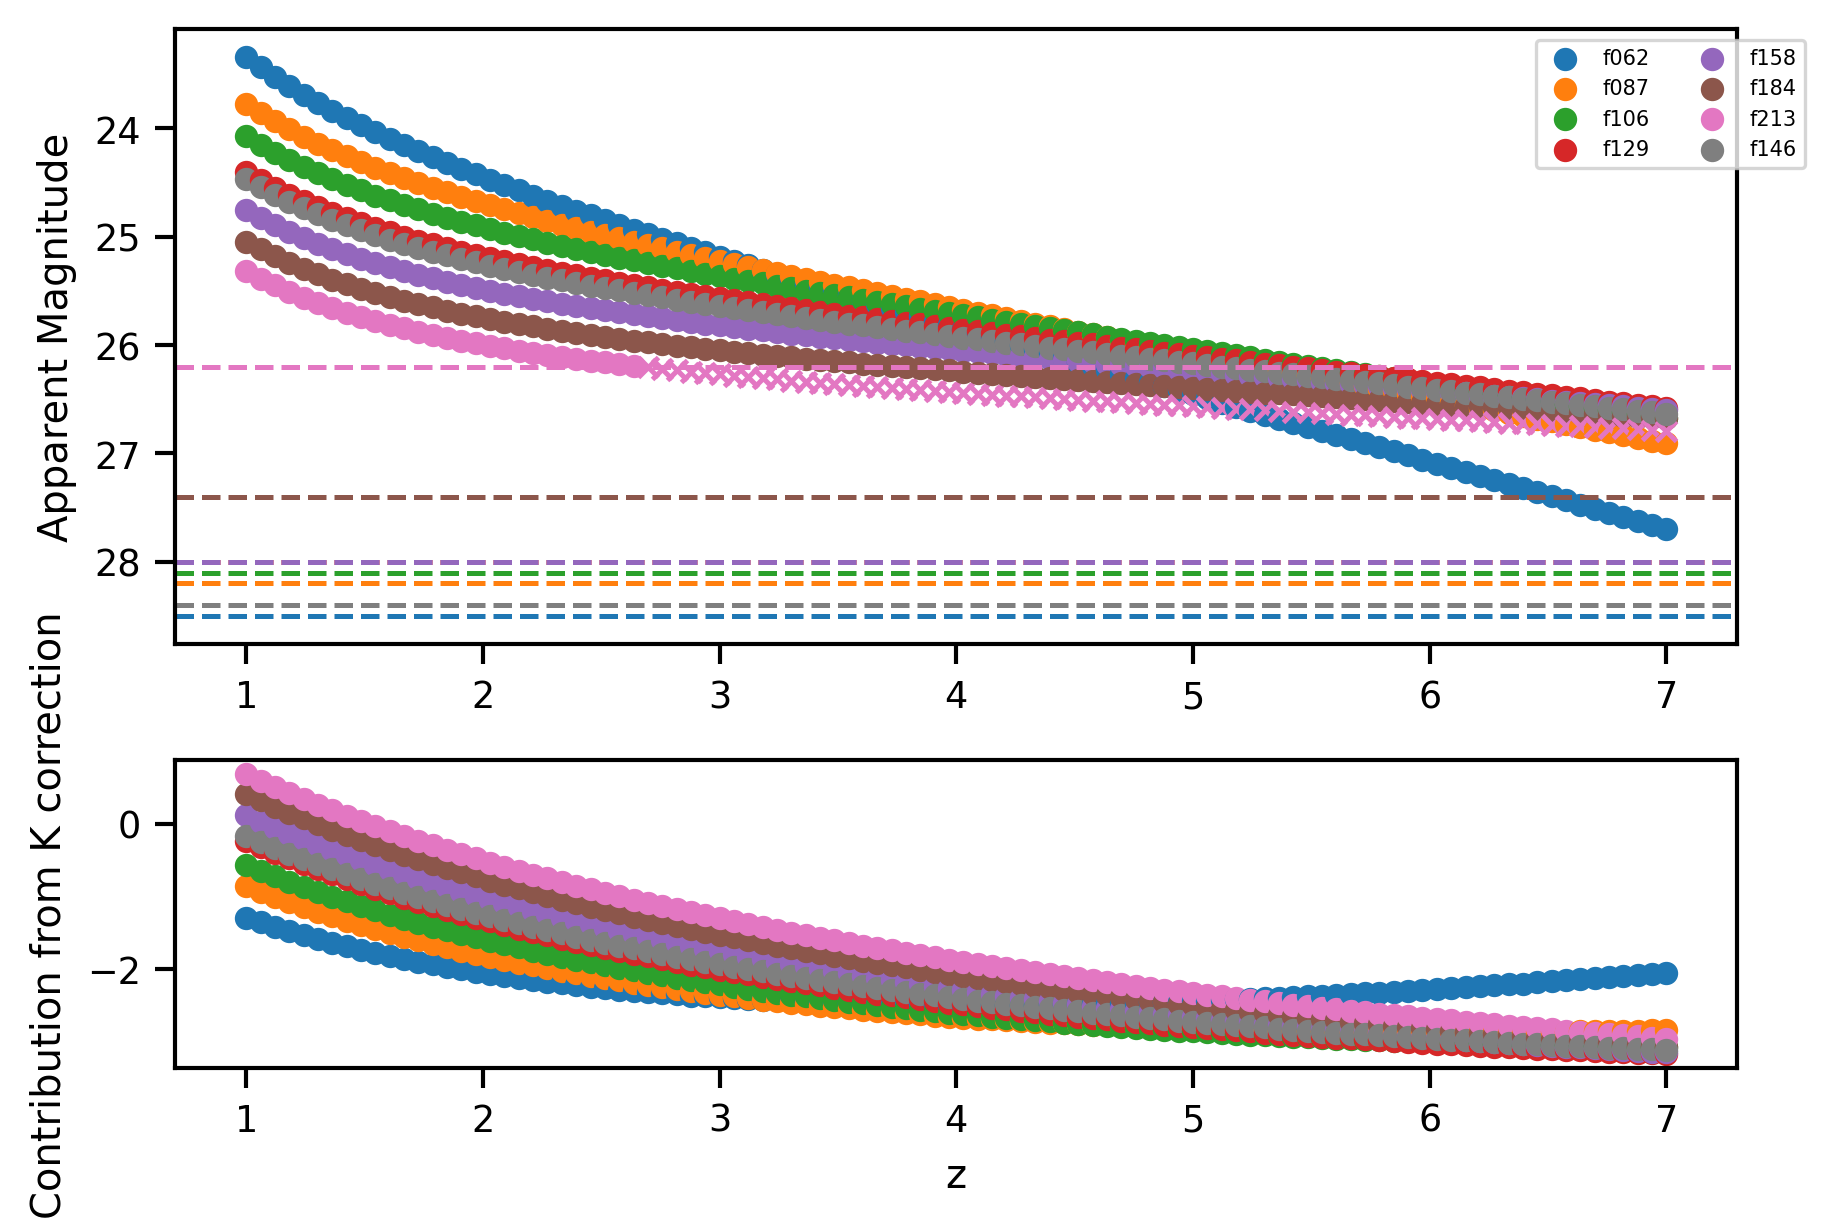

In [15]:
from astropy.cosmology import WMAP9 as cosmo

roman_filters = ['f062', 'f087', 
                 'f106', 'f129', 
                 'f158', 'f184', 
                 'f213', 'f146']

limits = [28.5, 28.2, 28.1, 28.0, 28.0, 27.4, 26.2, 28.4] # 1 hour point source limits

roman_limits = dict(zip(roman_filters, limits))

color_dict = {f: f'C{i}' for i, f in enumerate(roman_filters)}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi = 300, 
                               gridspec_kw={'height_ratios': [2, 1]})

mags = {filt: [] for filt in roman_filters}
for z in np.linspace(1, 7, 100):
    source = BlackBodySource(30000)
    bb_model = sncosmo.Model(source=source)
    bb_model.set(z=z)

    luminosity_distance = cosmo.luminosity_distance(z)
    
    for filt in roman_filters:
        filter_abs_mag = bb_model.bandmag(filt, 'ab', 0)
        app_mag = filter_abs_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
        mags[filt].append(app_mag)
        marker = 'o'
        if app_mag > roman_limits[filt]:
            marker = 'x'
        if z == 1:
            ax1.scatter(z, app_mag, marker = marker,
                        color = color_dict[filt], label = filt)
        else:
            ax1.scatter(z, app_mag, color = color_dict[filt], marker = marker)
        ax2.scatter(z, filter_abs_mag + 19.5, color = color_dict[filt])
            
for filt in roman_filters:
    ax1.axhline(roman_limits[filt], 
                c = color_dict[filt], ls = '--')
ax1.legend(bbox_to_anchor=[1.05, 1], ncol=2, fontsize=5)
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(ymax, ymin)
plt.tight_layout()
ax2.set_xlabel('z')
ax2.set_ylabel('Contribution from K correction')
ax1.set_ylabel('Apparent Magnitude')
plt.savefig('../figures/tde_mag_vs_z.png', dpi = 300)
plt.show()

In [16]:
zs = np.linspace(1, 7, 100)
for filt in roman_filters:
    print(filt)
    print(np.array(mags[filt])[np.where(zs>6)][0])

f062
27.094137034691915
f087
26.50105438668656
f106
26.364286418048444
f129
26.34592280851768
f158
26.42471798628697
f184
26.54062191342308
f213
26.681754192077634
f146
26.410131686056314


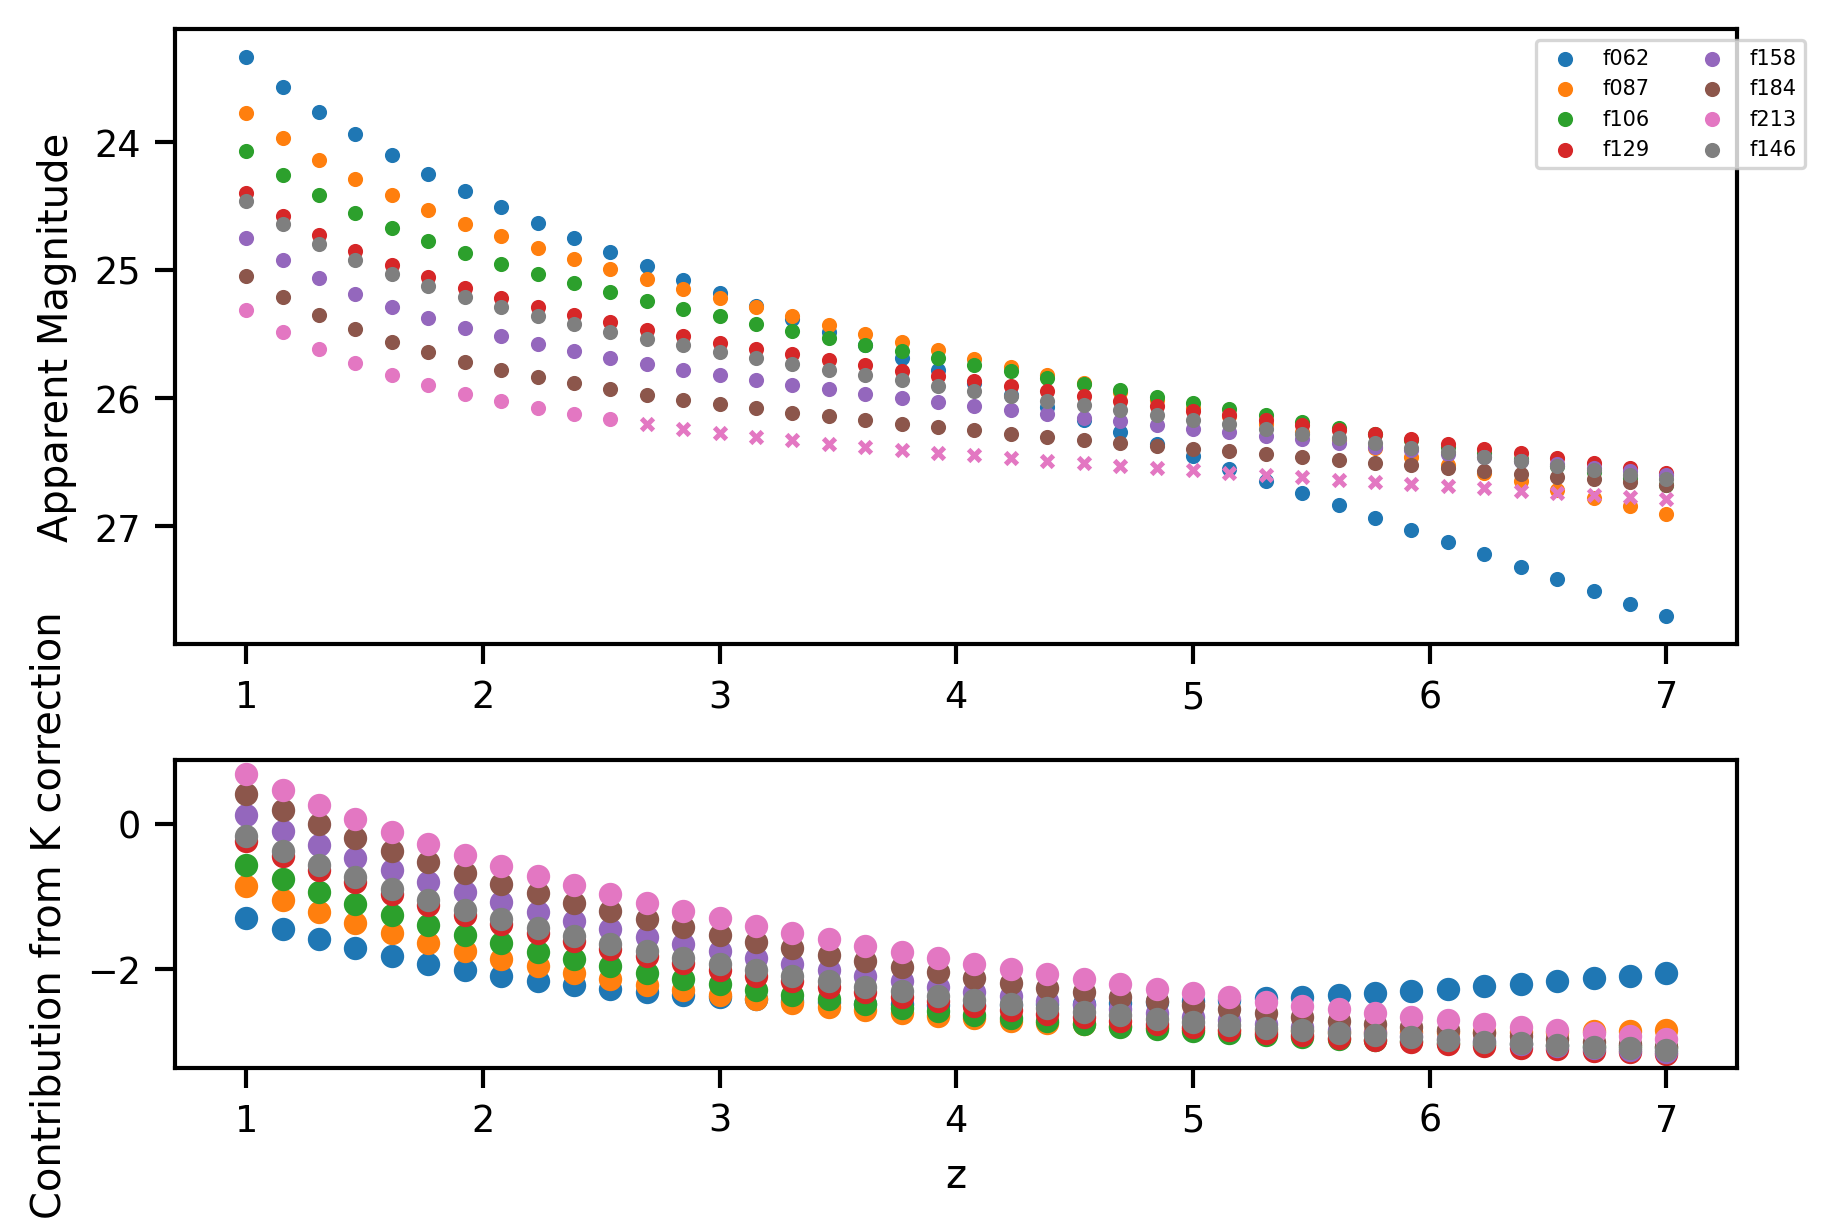

In [17]:
from astropy.cosmology import WMAP9 as cosmo

roman_filters = ['f062', 'f087', 
                 'f106', 'f129', 
                 'f158', 'f184', 
                 'f213', 'f146']

limits = [28.5, 28.2, 28.1, 28.0, 28.0, 27.4, 26.2, 28.4] # 1 hour point source limits

roman_limits = dict(zip(roman_filters, limits))

color_dict = {f: f'C{i}' for i, f in enumerate(roman_filters)}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi = 300, 
                               gridspec_kw={'height_ratios': [2, 1]})

for z in np.linspace(1, 7, 40):
    source = BlackBodySource(30000)
    bb_model = sncosmo.Model(source=source)
    bb_model.set(z=z)

    luminosity_distance = cosmo.luminosity_distance(z)
    
    for filt in roman_filters:
        filter_abs_mag = bb_model.bandmag(filt, 'ab', 0)
        app_mag = filter_abs_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
        marker = 'o'
        if app_mag > roman_limits[filt]:
            marker = 'x'
        if z == 1:
            ax1.scatter(z, app_mag, marker = marker,
                        color = color_dict[filt], label = filt, s = 8)
        else:
            ax1.scatter(z, app_mag, color = color_dict[filt], marker = marker, s = 8)
        ax2.scatter(z, filter_abs_mag + 19.5, color = color_dict[filt])
            
# for filt in roman_filters:
#     ax1.axhline(roman_limits[filt], 
#                 c = color_dict[filt], ls = '--')
ax1.legend(bbox_to_anchor=[1.05, 1], ncol=2, fontsize=5)
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(ymax, ymin)
plt.tight_layout()
ax2.set_xlabel('z')
ax2.set_ylabel('Contribution from K correction')
ax1.set_ylabel('Apparent Magnitude')
#plt.savefig('../figures/tde_mag_vs_z.png', dpi = 300)
plt.show()

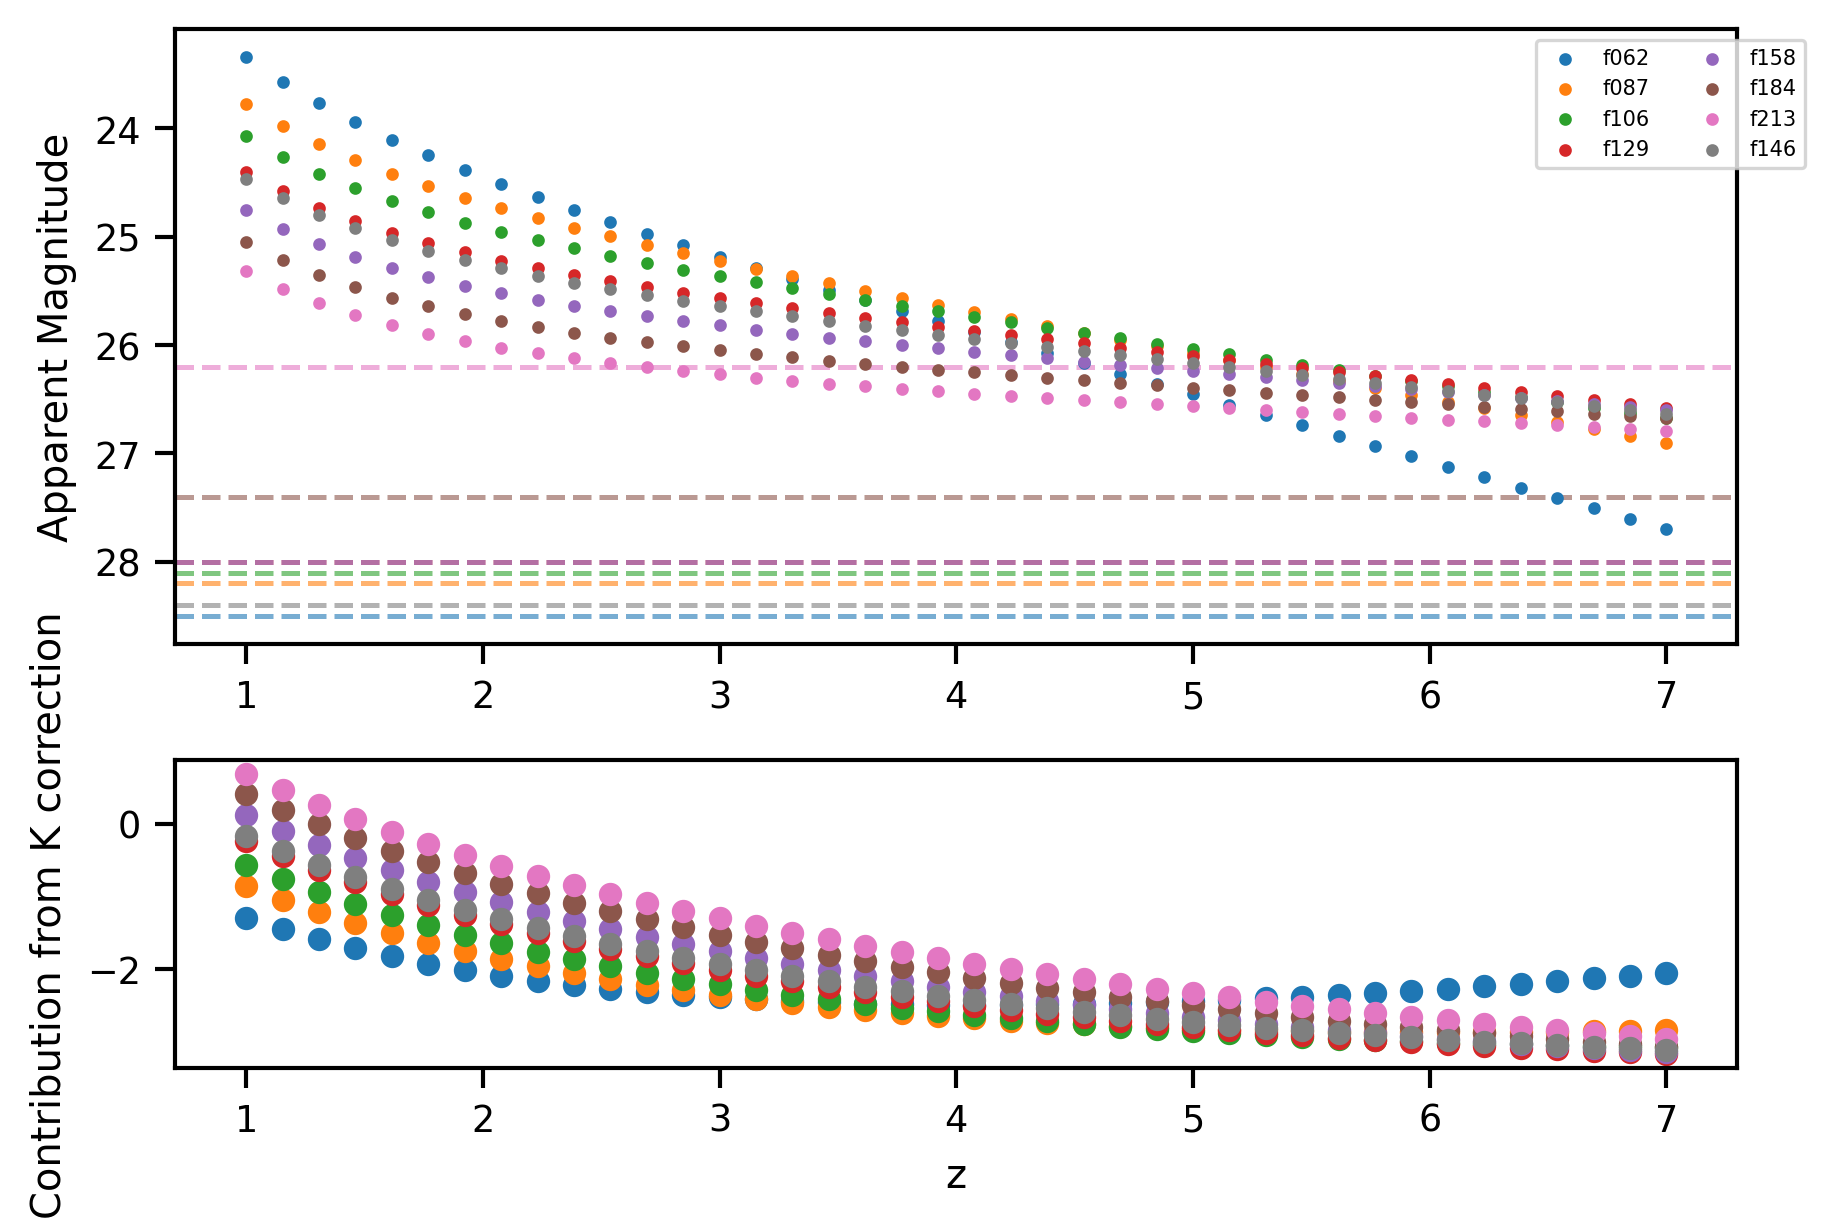

In [18]:
from astropy.cosmology import WMAP9 as cosmo

roman_filters = ['f062', 'f087', 
                 'f106', 'f129', 
                 'f158', 'f184', 
                 'f213', 'f146']

limits = [28.5, 28.2, 28.1, 28.0, 28.0, 27.4, 26.2, 28.4] # 1 hour point source limits

roman_limits = dict(zip(roman_filters, limits))

color_dict = {f: f'C{i}' for i, f in enumerate(roman_filters)}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi = 300, 
                               gridspec_kw={'height_ratios': [2, 1]})

for z in np.linspace(1, 7, 40):
    source = BlackBodySource(30000)
    bb_model = sncosmo.Model(source=source)
    bb_model.set(z=z)

    luminosity_distance = cosmo.luminosity_distance(z)
    
    for filt in roman_filters:
        filter_abs_mag = bb_model.bandmag(filt, 'ab', 0)
        app_mag = filter_abs_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
        marker = 'o'
#         if app_mag > roman_limits[filt]:
#             marker = 'x'
        if z == 1:
            ax1.scatter(z, app_mag, marker = marker,
                        color = color_dict[filt], label = filt, s = 5)
        else:
            ax1.scatter(z, app_mag, color = color_dict[filt], marker = marker, s = 5)
        ax2.scatter(z, filter_abs_mag + 19.5, color = color_dict[filt])
            
for filt in roman_filters:
    ax1.axhline(roman_limits[filt], 
                c = color_dict[filt], ls = '--', zorder = -1, alpha = 0.6)
ax1.legend(bbox_to_anchor=[1.05, 1], ncol=2, fontsize=5)
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(ymax, ymin)
plt.tight_layout()
ax2.set_xlabel('z')
ax2.set_ylabel('Contribution from K correction')
ax1.set_ylabel('Apparent Magnitude')
#plt.savefig('../figures/tde_mag_vs_z.png', dpi = 300)
plt.show()

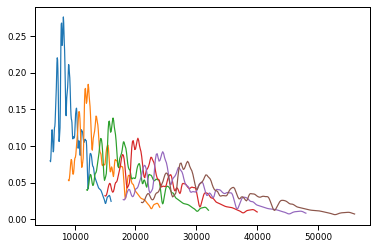

In [19]:
snia_model = sncosmo.Model(source='salt2')
for z in np.linspace(1, 6, 6):
    snia_model.set(z=z)
    snia_model.set(x1=0, x0=1051627384124.3574, c=0, t0=0)
    wave = np.linspace(3000, 8000, 200)*(1+z)
    flux = snia_model.flux(time=0, wave=wave)
    #print(snia_model.bandmag('sdssg', 'ab', 0))
    plt.plot(wave, flux)
    
plt.show()

could not to f184 band at z=1.0
could not to f213 band at z=1.0
could not to f146 band at z=1.0
could not to f184 band at z=1.1538461538461537
could not to f213 band at z=1.1538461538461537
could not to f146 band at z=1.1538461538461537
could not to f062 band at z=1.3076923076923077
could not to f213 band at z=1.3076923076923077
could not to f062 band at z=1.4615384615384617
could not to f213 band at z=1.4615384615384617
could not to f062 band at z=1.6153846153846154
could not to f062 band at z=1.7692307692307692
could not to f062 band at z=1.9230769230769231
could not to f062 band at z=2.076923076923077
could not to f062 band at z=2.230769230769231
could not to f062 band at z=2.3846153846153846
could not to f062 band at z=2.5384615384615383
could not to f062 band at z=2.6923076923076925
could not to f087 band at z=2.6923076923076925
could not to f062 band at z=2.8461538461538463
could not to f087 band at z=2.8461538461538463
could not to f062 band at z=3.0
could not to f087 band at z=

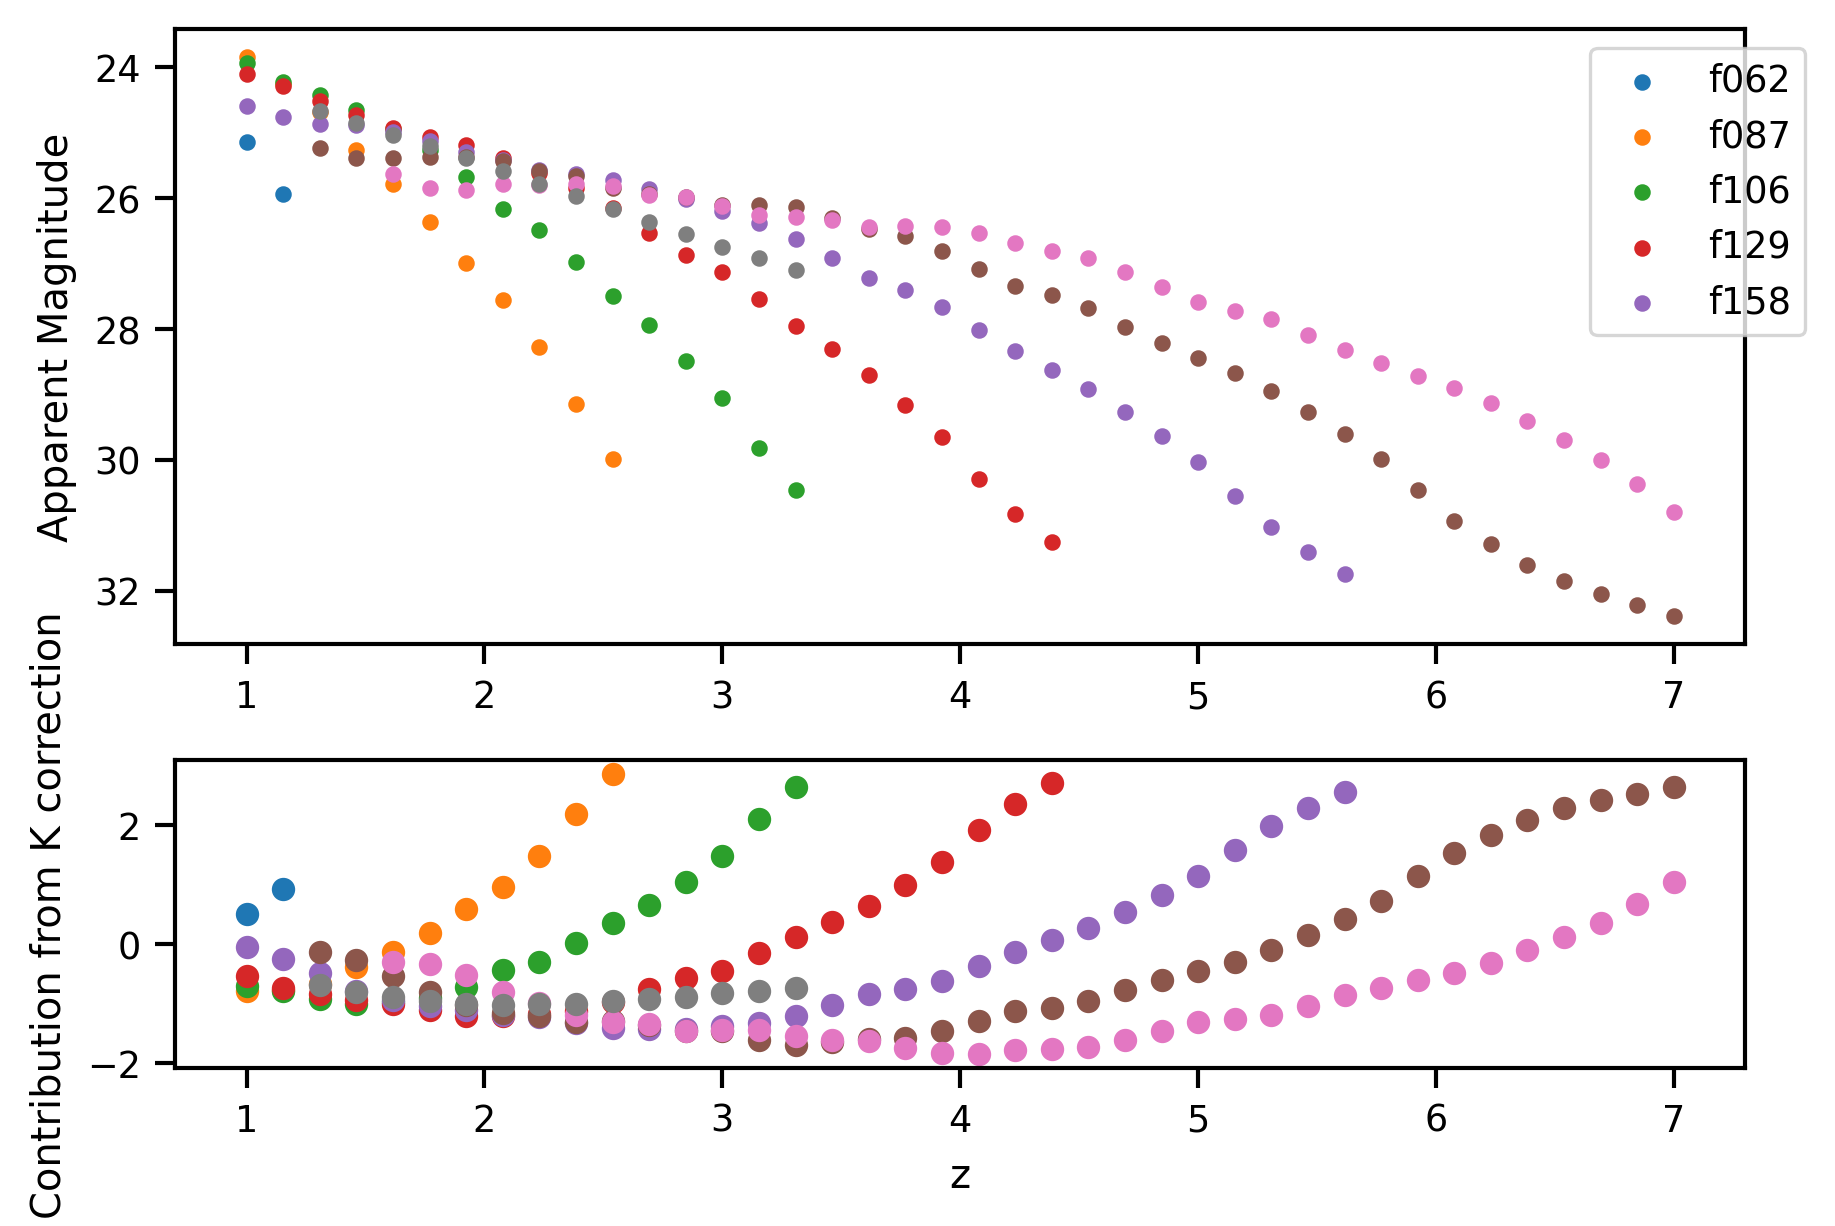

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi = 300, 
                               gridspec_kw={'height_ratios': [2, 1]})

for z in np.linspace(1, 7, 40):
    snia_model = sncosmo.Model(source='salt2')
    snia_model.set(z=z)
    snia_model.set(x1=0, c=0, x0= 1051627384124.3574, t0=0)

    luminosity_distance = cosmo.luminosity_distance(z)
    
    for filt in roman_filters:
        try:
            filter_abs_mag = snia_model.bandmag(filt, 'ab', 0)
            app_mag = filter_abs_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
            marker = 'o'
            if z == 1:
                ax1.scatter(z, app_mag, marker = marker,
                            color = color_dict[filt], label = filt, s = 10)
            else:
                ax1.scatter(z, app_mag, color = color_dict[filt], marker = marker, s = 10)
            ax2.scatter(z, filter_abs_mag + 19.5, color = color_dict[filt])
        except:
            print('could not to {} band at z={}'.format(filt, z))
            

ax1.legend(bbox_to_anchor=[1.05, 1])
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(ymax, ymin)
plt.tight_layout()
ax2.set_xlabel('z')
ax2.set_ylabel('Contribution from K correction')
ax1.set_ylabel('Apparent Magnitude')
plt.savefig('../figures/sne_mag_vs_z.png', dpi = 300)
plt.show()

https://sncosmo.readthedocs.io/en/stable/_images/bandpass-list-17.png

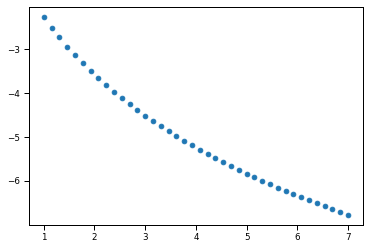

In [21]:
z = np.linspace(1, 7, 40)
plt.scatter(z, -7.5*np.log10(1+z))

In [22]:
1e-3 * 2.8/(30000)

9.333333333333334e-08

- Galaxies
- Volumetric Rates (#TDE/sq degree for amount of volume) $5 \times 10^-8 /yr/Mpc^3$
- TDE at least a magnitude above the detection limit
- Do parameters for Roman surveys
- Do a SNIa
- Compare to volumetric Ia rate
- z vs # detected per sq degree
- Angular size of the galaxies (size in kpc as function of z)